<a href="https://colab.research.google.com/github/rknayak/NNPytorch/blob/main/homework1star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/apl6g5g9svhnfyg/Dataset.zip

--2022-07-12 10:53:30--  https://www.dropbox.com/s/apl6g5g9svhnfyg/Dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/apl6g5g9svhnfyg/Dataset.zip [following]
--2022-07-12 10:53:31--  https://www.dropbox.com/s/raw/apl6g5g9svhnfyg/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7bd3659b799bf346d6d162f5bf.dl-eu.dropboxusercontent.com/cd/0/inline/Bo7IPhyXYOz6KzgzNJLnu2wnUr2V8vboGRng0rlqZl3uygqamSN9OPaZheDCaJoIkcVZU0y_Pa0HizcVZ4sLrjAlMR_ZN7wnJa8kWgUbSpFTr3zGMI9Vlq9SfPq7t97iShp77SJ3s3kv3M-0Bd9inEiDbiwQUgfCywJKlZZx4nreaA/file# [following]
--2022-07-12 10:53:31--  https://uc7bd3659b799bf346d6d162f5bf.dl-eu.dropboxusercontent.com/cd/0/inline/Bo7IPhyXYOz6KzgzNJLnu2wnUr2V8vboGRng0rlqZl3uygqamSN9OPaZheDCaJ

In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
replace Dataset/train/class2_9417.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
path_to_training_data = 'Dataset/train/'
path_to_validation_data = 'Dataset/validation/'

In [ ]:
#first we get a list of the files in the directory

import glob
#glob gives you a list of file paths to the images
filelist = glob.glob(path_to_training_data+'/*.png')

#print the first 10 entries:
filelist[:10]

['Dataset/train/class1_4610.png',
 'Dataset/train/class1_2642.png',
 'Dataset/train/class0_8399.png',
 'Dataset/train/class0_2241.png',
 'Dataset/train/class1_9460.png',
 'Dataset/train/class2_7630.png',
 'Dataset/train/class1_7722.png',
 'Dataset/train/class1_8805.png',
 'Dataset/train/class1_8651.png',
 'Dataset/train/class9_8028.png']

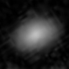

In [ ]:
from PIL import Image
Image.open(filelist[5])

In [ ]:
from torchvision import datasets, transforms
img = Image.open(filelist[5])
transforms.ToTensor()( img )

tensor([[[0.0196, 0.0275, 0.0392,  ..., 0.0510, 0.0353, 0.0235],
         [0.0157, 0.0196, 0.0275,  ..., 0.0471, 0.0353, 0.0235],
         [0.0078, 0.0118, 0.0157,  ..., 0.0392, 0.0314, 0.0196],
         ...,
         [0.0667, 0.0510, 0.0314,  ..., 0.0549, 0.0431, 0.0510],
         [0.0549, 0.0392, 0.0275,  ..., 0.0706, 0.0392, 0.0392],
         [0.0549, 0.0392, 0.0196,  ..., 0.0784, 0.0510, 0.0353]]])

In [ ]:
transforms.ToTensor()( img ).view(-1) #flatten it

tensor([0.0196, 0.0275, 0.0392,  ..., 0.0784, 0.0510, 0.0353])

In [ ]:
filelist[:5]

['Dataset/train/class1_4610.png',
 'Dataset/train/class1_2642.png',
 'Dataset/train/class0_8399.png',
 'Dataset/train/class0_2241.png',
 'Dataset/train/class1_9460.png']

In [ ]:
import torch
import numpy as np
labels = np.zeros(len(filelist))
for class_i in range(10):
    files_that_are_of_this_class = ['class'+str(class_i) in x for x in filelist]
    labels[ files_that_are_of_this_class ] = class_i
#the labels need to be converted to torch.LongTensor for multi-class classification
#see the documentation at https://pytorch.org/docs/stable/nn.html#crossentropyloss
labels = torch.LongTensor(labels)
labels    

tensor([1, 1, 0,  ..., 2, 0, 7])

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#from dataloader import CustomDataset build data loader here can be put in separate file
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from torchvision import datasets, transforms
from PIL import Image
import glob

class CustomDataset(Dataset):
    def __init__(self, path,n_classes=10,transform=False):
        
        self.n_classes = n_classes 
        self.transform = transform
        
        self.filelist = glob.glob(path+'/*.png') 
        
        labels = np.zeros(len(self.filelist))
        for class_i in range(n_classes):
            files_that_are_of_this_class = ['class'+str(class_i) in x for x in self.filelist]
            labels[ files_that_are_of_this_class ] = class_i
         

        self.labels =  torch.LongTensor(labels) # load the labels (copy from the notebook)


    def __len__(self):
       
        return len(self.filelist)


    def __getitem__(self, idx):
        
        img = Image.open(self.filelist[idx])
        if self.transform:
            img = transforms.RandomRotation(180)( img )
            
        x =  transforms.ToTensor()( img ).view(-1) #....transform to tesnor and  flatten it to a vector of 69*69 = 4761 with .view(-1)
        
        
        y = self.labels[idx]
    
        return x, y

In [ ]:
training_ds = CustomDataset(path_to_training_data)
validation_ds = CustomDataset(path_to_validation_data)


some_random_idx = 52
training_ds[some_random_idx]

(tensor([0.0000, 0.0000, 0.0000,  ..., 0.0275, 0.0196, 0.0078]), tensor(4))

In [ ]:
from torch.utils.data import Dataset, DataLoader

training_dataloader = DataLoader(training_ds,batch_size=300,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=300)

In [ ]:
for x,y in training_dataloader:
    print(x.shape,y.shape)
    break

torch.Size([300, 4761]) torch.Size([300])


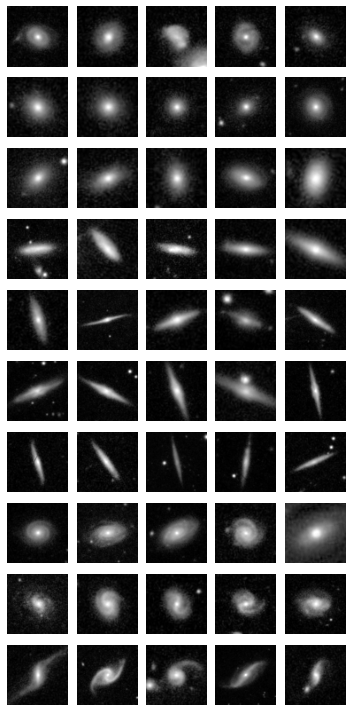

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(10,5,figsize=(5,10))
for class_i in range(10):
    idxs = np.where( training_ds.labels == class_i )[0]
    idxs = np.random.permutation(idxs)
    for plot_i in range(np.min([5,len(idxs)])):

        ax[class_i][plot_i].imshow(training_ds[idxs[plot_i]][0].reshape(69,69),cmap='gray')
        ax[class_i][plot_i].set_axis_off()
        
plt.tight_layout()
plt.show()

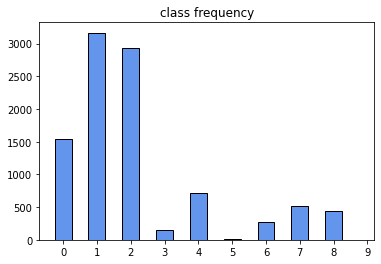

In [ ]:
plt.hist(training_ds.labels.data.numpy(),bins=np.linspace(0,9,19)-0.25,color='cornflowerblue',ec='k')
plt.xticks(np.arange(10))
plt.title('class frequency')
plt.show()

In [ ]:
from typing import overload
#build neural network
import torch
import numpy as np
import torch.nn as nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(69*69,512)# ...
        self.layer2 = nn.Linear(512,512)
        self.layer3 = nn.Linear(512,100)
        self.layer4 = nn.Linear(100,10)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.ReLU()
        self.activation3 = nn.ReLU()
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)
        
    
    def forward(self,x):
        
        #...
        out = self.layer1(x)
        out = self.activation1(out)
        out = self.dropout(out)
        out = self.layer2(out)
        out = self.activation2(out)
        out = self.layer3(out)
        out = self.activation3(out)
        out = self.dropout(out)
        out = self.layer4(out)


        return out


In [ ]:
net = Net()

In [ ]:
for x,y in training_dataloader:
    print(x.shape,net(x).shape,y.shape)
    break

torch.Size([300, 4761]) torch.Size([300, 10]) torch.Size([300])


In [ ]:
#the training
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 

In [ ]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0
    
    loss = 0
    
    if torch.cuda.is_available():
        net.cuda()
    net.eval()
    
    n_batches = 0
    with torch.no_grad():
        for x,y in dataloader:
            n_batches+=1
            
            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            pred = net(x) # This is a vector of size 10 (all probabilities that x belongs to that class)
            
            loss+= loss_func(pred,y).item()
            
            pred = torch.argmax(pred,dim=1)

            correct+=len(torch.where(pred==y)[0])
            total+=len(y)
    loss = loss/n_batches      
    return correct/total, loss

In [ ]:
compute_accuracy_and_loss(training_dataloader,net) # We excpect low accuracy since the net is not trained.

(0.2946, 2.2697685536216285)

In [ ]:
compute_accuracy_and_loss(valid_dataloader,net)

(0.2856, 2.269737678415635)

In [ ]:
#remember, you need to zero the gradient, compute the loss, compute the gradient, 
#then tell the optimizer to take a "step". when looping over the validation dataset 
#you don't need to compute the loss and you don't need the optimizer - just compute 
#the loss to see when to save your model.
if torch.cuda.is_available():
    net.cuda()

In [ ]:
from tqdm.notebook import tqdm
n_epochs = 50


training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

for epoch in pbar:
    
    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
                             ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))
    
    net.train() # put the net into "training mode"
    for x,y in training_dataloader:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()
            optimizer.zero_grad() # Set gradient to 0.
            output = net(x)       # Feed forward.
            loss = loss_func(output,y) # Loss calculation (y is the target)
            loss.backward()    #Gradient calculation.
        optimizer.step()  # Model weight modification based on the optimizer.
            
        # add the basic training loop here
    
    net.eval() #put the net into evaluation mode
    
    
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)
         
    training_loss_vs_epoch.append( train_loss)    
    training_acc_vs_epoch.append( train_acc )
    
    validation_acc_vs_epoch.append(valid_acc)
    
    validation_loss_vs_epoch.append(valid_loss)
    
    #save the model if the validation loss has decreased
    if len(validation_loss_vs_epoch)==1 or validation_loss_vs_epoch[-2] > validation_loss_vs_epoch[-1]:
        torch.save(net.state_dict(), 'trained_model.pt')


  0%|          | 0/50 [00:00<?, ?it/s]

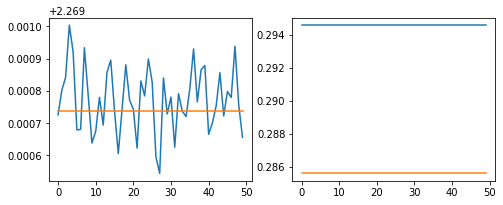

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='training')
ax[0].plot(validation_loss_vs_epoch,label='validation')

ax[1].plot(training_acc_vs_epoch)
ax[1].plot(validation_acc_vs_epoch)

plt.show()
